<h1>Assigment 2: SQL & ERD</h1>
<p> Student name: Chan Sze Ching Esther<br>
    Student no: 1155161782<br></p>

In [16]:
import pandas as pd 
import sqlite3      
con = sqlite3.connect('chinook.db') 
cursor = con.cursor()          
sql = "SELECT trackid,tracks.name,albums.Title AS album, media_types.Name AS media,genres.Name AS genres FROM tracks INNER JOIN albums ON Albums.AlbumId = tracks.AlbumId INNER JOIN media_types ON media_types.MediaTypeId = tracks.MediaTypeId INNER JOIN genres ON genres.GenreId = tracks.GenreId;"  
try:
    cursor.execute(sql)
    con.commit()
    print("Entry successfully retrieved.")
except Exception as e:
    print("Exception occurred.",e)
result = cursor.fetchall()
con.close()
df = pd.DataFrame(result, columns=[ 
'TrackID','Track_name','Album_titles','Media_type','Genres'
  ])
df.to_csv('track_record.csv',mode='w',index=False)
df

Entry successfully retrieved.


,TrackID,Track_name,Album_titles,Media_type,Genres
0,1,For Those About To Rock (We Salute You),For Those About To Rock We Salute You,MPEG audio file,Rock
1,2,Balls to the Wall,Balls to the Wall,Protected AAC audio file,Rock
2,3,Fast As a Shark,Restless and Wild,Protected AAC audio file,Rock
3,4,Restless and Wild,Restless and Wild,Protected AAC audio file,Rock
4,5,Princess of the Dawn,Restless and Wild,Protected AAC audio file,Rock
...,...,...,...,...,...
3498,3499,Pini Di Roma (Pinien Von Rom) \ I Pini Della V...,Respighi:Pines of Rome,Protected AAC audio file,Classical
3499,3500,"String Quartet No. 12 in C Minor, D. 703 ""Quar...",Schubert: The Late String Quartets & String Qu...,Protected AAC audio file,Classical
3500,3501,"L'orfeo, Act 3, Sinfonia (Orchestra)",Monteverdi: L'Orfeo,Protected AAC audio file,Classical
3501,3502,"Quintet for Horn, Violin, 2 Violas, and Cello ...",Mozart: Chamber Music,Protected AAC audio file,Classical


<p><center><b>ERD</b></center></p>
<img src="ERD.JPG" style="width:500px;height:500px">

In [17]:
import pandas as pd
import sqlite3
con = sqlite3.connect('chinook_2.db')
df = pd.read_csv('track_record.csv')
df
df.to_sql('track_record', con, if_exists='append', index = False)
con.close()
df

,TrackID,Track_name,Album_titles,Media_type,Genres
0,1,For Those About To Rock (We Salute You),For Those About To Rock We Salute You,MPEG audio file,Rock
1,2,Balls to the Wall,Balls to the Wall,Protected AAC audio file,Rock
2,3,Fast As a Shark,Restless and Wild,Protected AAC audio file,Rock
3,4,Restless and Wild,Restless and Wild,Protected AAC audio file,Rock
4,5,Princess of the Dawn,Restless and Wild,Protected AAC audio file,Rock
...,...,...,...,...,...
3498,3499,Pini Di Roma (Pinien Von Rom) \ I Pini Della V...,Respighi:Pines of Rome,Protected AAC audio file,Classical
3499,3500,"String Quartet No. 12 in C Minor, D. 703 ""Quar...",Schubert: The Late String Quartets & String Qu...,Protected AAC audio file,Classical
3500,3501,"L'orfeo, Act 3, Sinfonia (Orchestra)",Monteverdi: L'Orfeo,Protected AAC audio file,Classical
3501,3502,"Quintet for Horn, Violin, 2 Violas, and Cello ...",Mozart: Chamber Music,Protected AAC audio file,Classical


In [18]:
import pandas as pd 
import sqlite3      
con = sqlite3.connect('chinook_2.db') 
cursor = con.cursor()            #
sql = "SELECT genres, COUNT(Album_titles) AS Count FROM track_record GROUP BY genres ORDER BY Count DESC"  
try:
    cursor.execute(sql)
    con.commit()
    print("Entry successfully retrieved.")
except Exception as e:
    print("Exception occurred.",e)
# Display results
result = cursor.fetchall()
print(type(result))
print(result)
print(pd.DataFrame(result)) 
print('\n')
con.close()
df = pd.DataFrame(result, columns=[ 
'Genres','Count'
  ])
df.to_csv('GC.csv',mode='w',index=False)
df

Entry successfully retrieved.
<class 'list'>
[('Rock', 1297), ('Latin', 579), ('Metal', 374), ('Alternative & Punk', 332), ('Jazz', 130), ('TV Shows', 93), ('Blues', 81), ('Classical', 74), ('Drama', 64), ('R&B/Soul', 61), ('Reggae', 58), ('Pop', 48), ('Soundtrack', 43), ('Alternative', 40), ('Hip Hop/Rap', 35), ('Electronica/Dance', 30), ('World', 28), ('Heavy Metal', 28), ('Sci Fi & Fantasy', 26), ('Easy Listening', 24), ('Comedy', 17), ('Bossa Nova', 15), ('Science Fiction', 13), ('Rock And Roll', 12), ('Opera', 1)]
                     0     1
0                 Rock  1297
1                Latin   579
2                Metal   374
3   Alternative & Punk   332
4                 Jazz   130
5             TV Shows    93
6                Blues    81
7            Classical    74
8                Drama    64
9             R&B/Soul    61
10              Reggae    58
11                 Pop    48
12          Soundtrack    43
13         Alternative    40
14         Hip Hop/Rap    35
15   Electr

,Genres,Count
0,Rock,1297
1,Latin,579
2,Metal,374
3,Alternative & Punk,332
4,Jazz,130
5,TV Shows,93
6,Blues,81
7,Classical,74
8,Drama,64
9,R&B/Soul,61


Top 10 and the count are: [['Rock', 1297], ['Latin', 579], ['Metal', 374], ['Alternative & Punk', 332], ['Jazz', 130], ['TV Shows', 93], ['Blues', 81], ['Classical', 74], ['Drama', 64], ['R&B/Soul', 61]]
Top 10 genres are: 
 ['Rock', 'Latin', 'Metal', 'Alternative & Punk', 'Jazz', 'TV Shows', 'Blues', 'Classical', 'Drama', 'R&B/Soul']
All count are: 
 [1297, 579, 374, 332, 130, 93, 81, 74, 64, 61]


<ipython-input-19-fafccc71ec47>:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot()


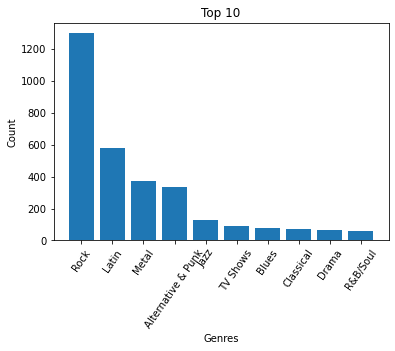

In [19]:
import pandas as pd
import matplotlib.pyplot as plt 
df = pd.read_csv("GC.csv", skiprows=range(11, 26))
df
GC_list = df.values.tolist()
print("Top 10 and the count are:", GC_list)
top10 = []
count = []
for i in GC_list:
    top10.append(i[0])
    count.append(i[1])
print("Top 10 genres are:","\n", top10)
print("All count are:", "\n",count)
plt.bar(range(len(top10)),count) 
plt.title('Top 10')
plt.xlabel("Genres")
plt.ylabel("Count")
ax = plt.subplot()
ax.set_xticks([0,1,2,3,4,5,6,7,8,9])
ax.set_xticklabels(top10, rotation=55)
plt.show()